In [3]:
import torch
from PIL import Image
import numpy as np
from typing import List, Set, Dict, Tuple, Optional, Union
import os
from scalabel.label.io import load
from os import listdir
from os.path import isfile, join

In [4]:
from bdd100k_dataloader import Bdd100kDataset

In [5]:
train_path = '/cluster/scratch/zhejiang/bdd100k/images/100k/val'
train_set_names = "/cluster/scratch/zhejiang/bdd100k/data/val.txt"
label_train_path = "/cluster/scratch/zhejiang/bdd100k/labels/bdd100k_labels_images_val.json"

In [6]:
def load_list_image_names(path: str) -> List[str]:
    """
    reads predefined set of image names for train/val/test and returns list of it
    """
    with open(path) as f:
        lines = f.read().splitlines()
        return lines

In [7]:
train_dataset = Bdd100kDataset(load_list_image_names(train_set_names), train_path, label_train_path)

In [8]:
train_dataset.__len__()

10000

In [7]:
train_dataset.__getitem__(69862)[1]

2

In [8]:
def weatherSelector(dataset, weather_label):
    n = train_dataset.__len__()
    weathers = []
    for i in range(n):
        item = train_dataset.__getitem__(i)
        if item[1] == weather_label:
            weathers.append(item[0])
    return weathers

In [9]:
import pickle
def save_dict(obj, name ):
    with open('/cluster/scratch/zhejiang/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
def load_dict(name):
    with open('/cluster/scratch/zhejiang/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [10]:
import time

start = time.time()

n = train_dataset.__len__()
overcast = []
snow = []
for i in range(n):
    item = train_dataset.__getitem__(i)
    if item[1] == 4:
        overcast.append(item[0])
    if item[1] == 3:
        snow.append(item[0])
save_dict(snow, 'snow')
save_dict(overcast, 'overcast')
end = time.time()
print(end - start)

638.0063359737396


In [16]:
from sys import getsizeof
getsizeof(weathers)

360

In [17]:
len(weathers[1])

5070

In [13]:
print(train_dataset[0][0].shape)
image = train_dataset[0][0]

torch.Size([720, 1280, 4])


[2021-12-22 14:19:17,025 image.py:719 set_data] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([720, 1280, 3])


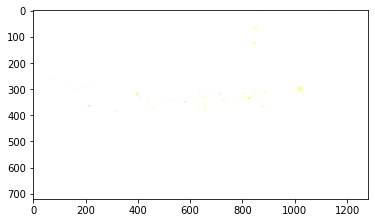

In [19]:
import matplotlib.pyplot as plt
print(image[:,:,0:3].shape)
plt.imshow( image[:,:,0:3])

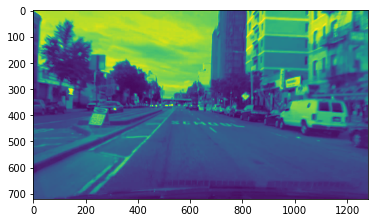

In [21]:
plt.imshow( image[:,:,0])